In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline


In [141]:
# import the dataset 
df = pd.read_csv('SLR_data.csv')

In [142]:
df.head() 

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

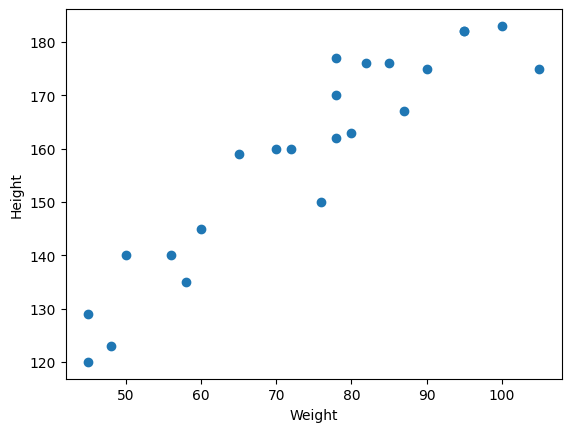

In [143]:
#Scatter Plot
plt.scatter(df['Weight'], df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [144]:
# Finding Coorelation
df.corr()

,Weight,Height
Weight,1.000000,0.930281
Height,0.930281,1.000000


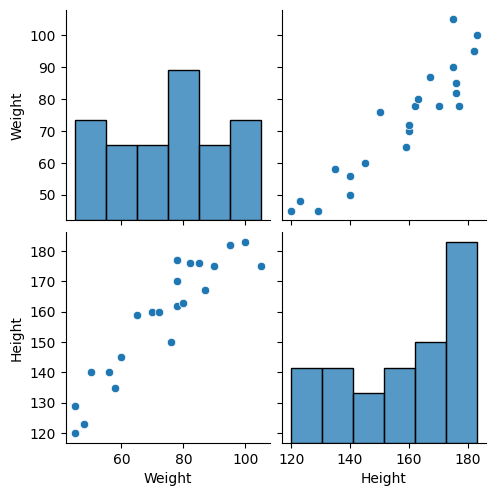

In [145]:
# Seaborn for visualization
import seaborn as sns
sns.pairplot(df) # visualize the correlation

In [146]:
# Independent and Dependent Features
X = df[['Weight']] # Independent feature should be dataframe or 2-D Array
Y = df['Height'] # this variable can be in series or 1-D Array

np.array(X).shape

(23, 1)

In [147]:
np.array(Y).shape

(23,)

In [148]:
Y.head()

0    120
1    135
2    123
3    145
4    160
Name: Height, dtype: int64

In [149]:
# Train Test Split 
from sklearn.model_selection import train_test_split  # import sklearn 


In [150]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [151]:
X_train.shape  # 2-D O/P

(17, 1)

In [152]:
# Standardization (SK_learn Library)
# takes each independent feature and apply z_score formula (gets applied to all DataPoints)
from sklearn.preprocessing import StandardScaler

In [153]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # transformation applies to all the datapoints

In [154]:
X_train

array([[-0.87662801],
       [ 1.66773133],
       [ 0.33497168],
       [-1.48242785],
       [ 1.36483141],
       [-1.6641678 ],
       [-0.75546804],
       [-0.1496682 ],
       [ 0.21381171],
       [-1.36126788],
       [-0.99778797],
       [-0.02850823],
       [ 1.06193149],
       [ 0.57729161],
       [ 0.75903157],
       [ 0.88019153],
       [ 0.45613165]])

In [155]:
X_test = scaler.transform(X_test)

In [156]:
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [157]:
# Apply simple linear regression from sklearn
from sklearn.linear_model import LinearRegression

In [158]:
# Always initialize the objects when using from sklearn
regression = LinearRegression(n_jobs=-1)

In [159]:
regression.fit(X_train,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [160]:
regression

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [161]:
print('Coefficient | Slope:',regression.coef_)   # calculated Beta 1  Unit movement!!
print('Intercept:',regression.intercept_)  # Calcuated Beta 0 || Line meet point

Coefficient | Slope: [17.5660992]
Intercept: 156.8235294117647


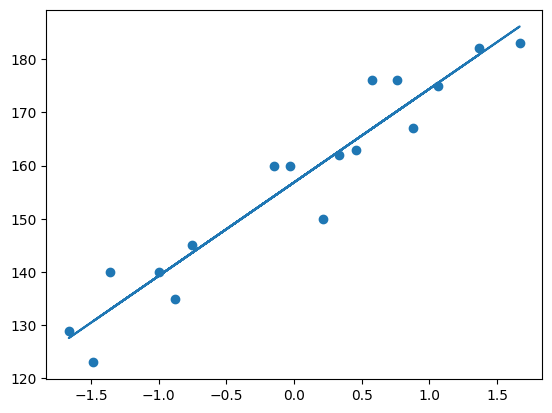

In [162]:
# Plot Training data plot best fit line
plt.scatter(X_train,Y_train)
plt.plot(X_train,regression.predict(X_train))   # Plots the best fit line created for the data

### Predection of test data
1. Predicted height output = intercept + coef_(Weights)
2. Y_pred_test = 156.823 + 17.56(X_test)

In [163]:
# predection for the Test Data
Y_pred = regression.predict(X_test)

In [164]:
## Performance Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [165]:
mse = mean_squared_error(Y_test,Y_pred)
mae = mean_absolute_error(Y_test,Y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

114.88672856557544
9.490518277712878
10.718522685779764


# R-Square
## R`2 = 1 - SSR/SST
### R`2 = coefficient of determination, SSR = Sum of squares of residuals, SST = Total sum of squares

In [166]:
from sklearn.metrics import r2_score

In [167]:
score = r2_score(Y_test,Y_pred)
print(score) #percentage

0.7359768765808672


# Adjusted R-Square
## Where:
### R2: The R2 of the model, n: The number of Observations, K: The number of predictor variables


In [168]:
# Displaying adjusted R-squared
1 - (1-score) * (len(Y_test)-1)/(len(Y_test) - X_test.shape[1]-1)

0.669971095726084